## 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è Î∂àÎü¨Ïò§Í∏∞  
YOLO Î™®Îç∏ÏùÑ Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú ÌôòÍ≤ΩÏùÑ Íµ¨ÏÑ±ÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌïòÍ≥†, Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎî©Ïóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

> ‚úÖ ÏÑ§Ïπò Ìå®ÌÇ§ÏßÄ
- `ultralytics`: YOLO Î™®Îç∏ Ïã§Ìñâ Î∞è ÌïôÏäµ
- `opencv-python`: Ïù¥ÎØ∏ÏßÄ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
- `numpy`, `matplotlib`: Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî

> ‚úÖ Î∂àÎü¨Ïò§Îäî ÌïµÏã¨ ÎùºÏù¥Î∏åÎü¨Î¶¨
- `torch`, `torchvision`: Î™®Îç∏ ÌïôÏäµ Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- `ultralytics.YOLO`: YOLO Î™®Îç∏ Î°úÎî©
- `cv2`, `numpy`: Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Î∞è ÏàòÏπò Í≥ÑÏÇ∞
- `tqdm`, `matplotlib.pyplot`: ÏãúÍ∞ÅÌôî Î∞è ÏßÑÌñâ ÌëúÏãú

In [1]:
!pip install ultralytics opencv-python numpy matplotlib tqdm pyyaml -q

import os
import cv2
import torch
import yaml
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
from ultralytics import YOLO
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 56.3/56.3 MB 30.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

## 2. ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï

Ïã§ÌóòÏùò ÏùºÍ¥ÄÏÑ±ÏùÑ Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ `random`, `numpy`, `torch`Ïùò ÏãúÎìúÎ•º Í≥†Ï†ïÌï©ÎãàÎã§.  

In [2]:
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
seed_everything()

## 3. Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú ÏÑ§Ï†ï Î∞è YAML ÌååÏùº Î°úÎìú
`data.yaml` ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÌïôÏäµ(train), Í≤ÄÏ¶ù(val) Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÎ°úÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.

> ‚úÖ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îäî Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî Îç∞ ÏÇ¨Ïö©ÎêòÎ©∞,  
> ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Îäî ÌïôÏäµ Ï§ë Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥† Í≥ºÏ†ÅÌï© Ïó¨Î∂ÄÎ•º ÌôïÏù∏ÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.

In [3]:
DATA_YAML_PATH = "/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/data.yaml"

with open(DATA_YAML_PATH, "r", encoding="utf-8") as f:
    data_yaml = yaml.safe_load(f)

DATASET_PATH = os.path.dirname(DATA_YAML_PATH)
TRAIN_IMAGES = os.path.join(DATASET_PATH, data_yaml["train"].replace("../", ""))
VALID_IMAGES = os.path.join(DATASET_PATH, data_yaml["val"].replace("../", ""))

print(DATASET_PATH)
print(TRAIN_IMAGES)
print(VALID_IMAGES)

/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE
/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images
/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images


## 4. Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ Ï†ïÏùò Î∞è Î°úÎìú  
Í∞ùÏ≤¥ ÌÉêÏßÄ Î™®Îç∏ÏùÑ ÏúÑÌïú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Î∂àÎü¨Ïò§Îäî Í≥ºÏ†ïÏûÖÎãàÎã§.  
OpenCVÏôÄ globÏùÑ ÌôúÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º Î°úÎìúÌïòÍ≥†, torchvision.transformsÎ•º Ï†ÅÏö©Ìï¥  
ÌÅ¨Í∏∞ Î≥ÄÌôò Î∞è ÌÖêÏÑú Î≥ÄÌôòÏùÑ ÏàòÌñâÌï©ÎãàÎã§.  
ÎßàÏßÄÎßâÏúºÎ°ú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïò¨Î∞îÎ•¥Í≤å Î∂àÎü¨ÏôÄÏ°åÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå


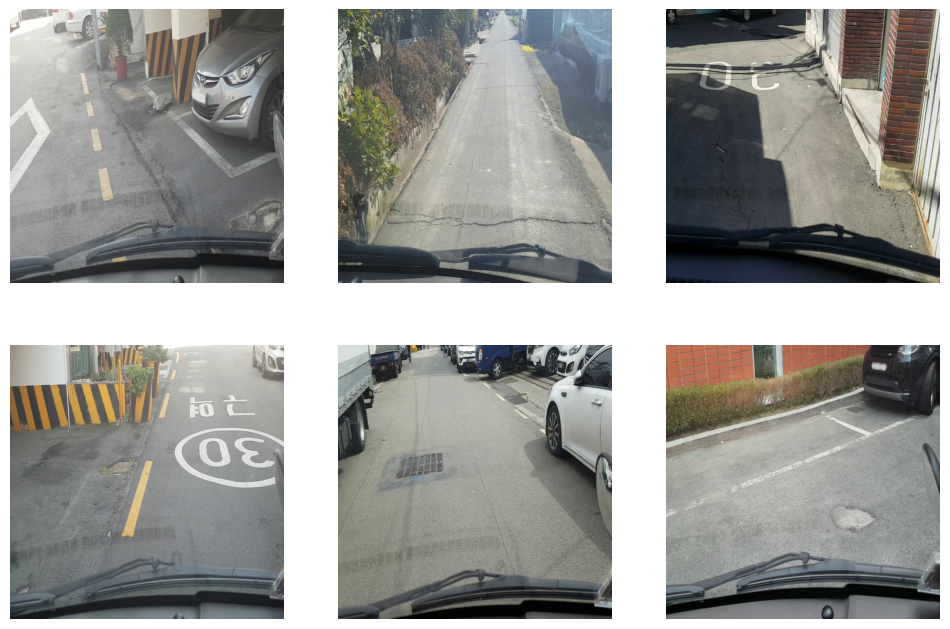

In [4]:
class PotholeDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_paths = glob(os.path.join(image_dir, "*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = cv2.imread(self.image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        return self.transform(img) if self.transform else img


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
])

train_loader = DataLoader(PotholeDataset(TRAIN_IMAGES, transform), batch_size=16, shuffle=True)
valid_loader = DataLoader(PotholeDataset(VALID_IMAGES, transform), batch_size=16, shuffle=False)


def show_sample_images(image_loader):
    sample_images = next(iter(image_loader))

    fig, ax = plt.subplots(2, 3, figsize=(12, 8))

    for i, img in enumerate(sample_images[:6]):
        ax[i // 3, i % 3].imshow(img.permute(1, 2, 0).numpy())
        ax[i // 3, i % 3].axis("off")

    plt.show()


print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå")
show_sample_images(train_loader)

## 5. ÎûúÎç§ ÏÉòÌîå ÏãúÍ∞ÅÌôî (Ïù¥ÎØ∏ÏßÄ + ÎùºÎ≤®)

ÌïôÏäµ Ïù¥ÎØ∏ÏßÄ Ï§ë ÌïòÎÇòÎ•º ÎûúÎç§ÏúºÎ°ú ÏÑ†ÌÉùÌïòÏó¨ Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® Ï†ïÎ≥¥Î•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.  
ÎùºÎ≤®ÏùÄ YOLO Ìè¨Îß∑Ïùò Ï¢åÌëú Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î†§ ÌôïÏù∏Ìï©ÎãàÎã§.


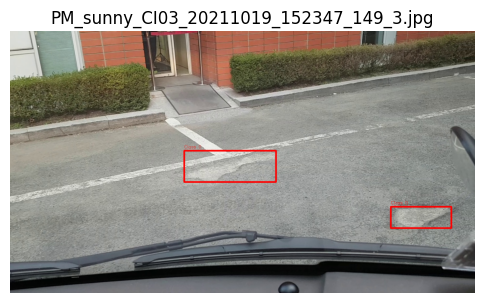

In [5]:
IMAGE_DIR = "/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images"
IMAGE_PATHS = sorted(glob(os.path.join(IMAGE_DIR, "*.jpg")))

IMG_PATH = random.choice(IMAGE_PATHS)
LABEL_PATH = IMG_PATH.replace("images", "labels").replace(".jpg", ".txt")

img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

if os.path.exists(LABEL_PATH):
    with open(LABEL_PATH, "r") as f:
        for line in f.readlines():
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = int((cx - bw / 2) * w)
            y1 = int((cy - bh / 2) * h)
            x2 = int((cx + bw / 2) * w)
            y2 = int((cy + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 5)
            cv2.putText(img, f"Class {int(cls)}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1)
else:
    print("ÎùºÎ≤® ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§:", LABEL_PATH)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(os.path.basename(IMG_PATH))
plt.show()

## 6. YOLO Î™®Îç∏ ÌïôÏäµ  
YOLO Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ ÌïôÏäµÏùÑ ÏàòÌñâÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
Îç∞Ïù¥ÌÑ∞ÏÖã Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌïòÍ≥†, ÏóêÌè¨ÌÅ¨ Ïàò Î∞è Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌïòÏó¨ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú YOLO ÌïôÏäµ Í≤∞Í≥ºÎäî `runs/detect/train` ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•Îê©ÎãàÎã§.  
- Ï∫êÍ∏Ä ÌôòÍ≤ΩÏóêÏÑúÎäî Ï†ÄÏû• Í≤ΩÎ°úÎ•º ÏßÅÏ†ë ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.
- `project` Î∞è `name` ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÌïòÎäî Í≤ΩÎ°úÏóê Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [6]:
model = YOLO("/kaggle/input/jongyu/best.pt")

def train_model():
    results = model.train(
        data=DATA_YAML_PATH,
        epochs=5,
        imgsz=640,
        batch=16,
        workers=4,
        device="0",
        project="/kaggle/working",
        name="pothole_yolov8_train"
    )
    return results

results = train_model()

Ultralytics 8.3.123 üöÄ Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/jongyu/best.pt, data=/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=/kaggle/working, name=pothole_yolov8_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 17.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 74.7MB/s]


AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 0.4¬±0.2 ms, read: 76.9¬±33.2 MB/s, size: 729.9 KB)


train: Scanning /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/labels... 24279 images, 0 backgrounds, 11 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24290/24290 [01:53<00:00, 214.37it/s]

train: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_112426_804_3.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_112426_804_3.jpg'
train: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_112426_805_1.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_112426_805_1.jpg'
train: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_112426_806_3.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_112426_806_3.jpg'
train: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train/images/AM_sunny_CI02_20211020_1124

WARNING ‚ö†Ô∏è train: Cache directory /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 82.2¬±20.8 MB/s, size: 695.1 KB)


val: Scanning /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/labels... 5998 images, 0 backgrounds, 2 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6000/6000 [00:28<00:00, 213.14it/s]

val: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images/AM_sunny_CI02_20211020_112426_809_2.jpg: ignoring corrupt image/label: broken data stream when reading image file
val: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images/AM_sunny_CI02_20211020_112426_813_1.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images/AM_sunny_CI02_20211020_112426_813_1.jpg'


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/pothole_yolov8_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/pothole_yolov8_train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      6.26G      1.234     0.8352      1.032         44        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1518/1518 [15:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188/188 [01:04<00:00,  2.91it/s]


                   all       5998      15797      0.804      0.703      0.795      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      6.59G      1.235      0.822      1.029         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1518/1518 [15:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188/188 [01:04<00:00,  2.90it/s]


                   all       5998      15797      0.801       0.69      0.782      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      6.59G      1.229     0.8104      1.023         28        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1518/1518 [15:03<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188/188 [01:07<00:00,  2.79it/s]


                   all       5998      15797      0.821      0.721      0.818      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      6.59G       1.18     0.7506      1.006         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1518/1518 [15:03<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188/188 [01:06<00:00,  2.85it/s]


                   all       5998      15797      0.838      0.747      0.842      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      6.59G      1.119     0.6735     0.9816         46        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1518/1518 [15:00<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188/188 [01:04<00:00,  2.90it/s]


                   all       5998      15797      0.852      0.781       0.87      0.596

5 epochs completed in 1.350 hours.
Optimizer stripped from /kaggle/working/pothole_yolov8_train/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/pothole_yolov8_train/weights/best.pt, 52.0MB

Validating /kaggle/working/pothole_yolov8_train/weights/best.pt...
Ultralytics 8.3.123 üöÄ Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 188/188 [01:08<00:00,  2.75it/s]


                   all       5998      15797      0.852      0.781       0.87      0.595


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 6.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/pothole_yolov8_train


## 7. ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

YOLO Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ï†ÄÏû•Îêú ÏÜêÏã§ Í∑∏ÎûòÌîÑ(`results.png`)Î•º Î∂àÎü¨ÏôÄ ÏãúÍ∞ÅÌôîÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
`matplotlib`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ≥†, Í∑∏ÎûòÌîÑ Ïô∏ ÏöîÏÜåÎäî Ï†úÍ±∞ÌïòÏó¨ ÍπîÎÅîÌïòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.

- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌïôÏäµ Í≤∞Í≥ºÎäî `runs/detect/train` ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•Îê©ÎãàÎã§.  
- Ï∫êÍ∏Ä ÌôòÍ≤ΩÏóêÏÑúÎäî Ï†ÄÏû•Îêú Í≤ΩÎ°úÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.


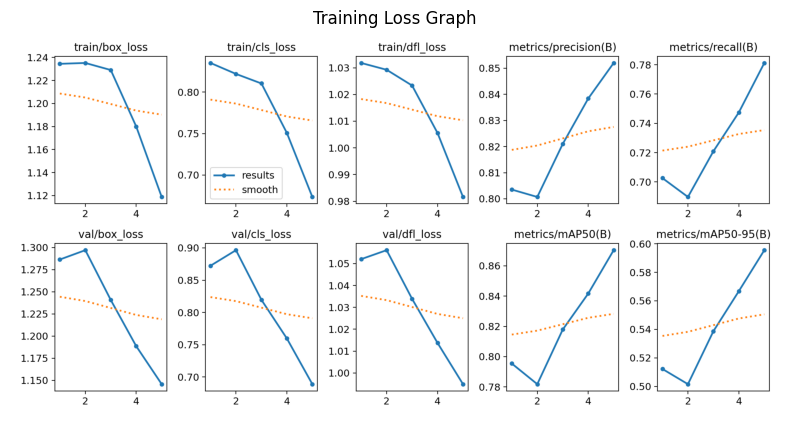

In [7]:
TRAIN_RUN_DIR = "/kaggle/working/pothole_yolov8_train"
loss_plot_path = f"{TRAIN_RUN_DIR}/results.png"

img = plt.imread(loss_plot_path)
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Training Loss Graph")
plt.show()

## 8. Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä  
ÌïôÏäµÎêú YOLO Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Ïö©Ìï¥ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
`val()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ `mAP`, `Precision`, `Recall` Îì±Ïùò ÏÑ±Îä• ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

- Ï∫êÍ∏Ä ÌôòÍ≤ΩÏóêÏÑúÎäî Î™®Îç∏Ïù¥ Ï†ÄÏû•Îêú Í≤ΩÎ°úÎ•º ÏßÄÏ†ïÌï¥Ï§òÏïº Ìï©ÎãàÎã§.


In [8]:
model = YOLO("/kaggle/working/pothole_yolov8_train/weights/best.pt")

val_results = model.val(data=DATA_YAML_PATH, split="val")

print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(f"mAP50: {val_results.box.map50:.4f}")
print(f"mAP50-95: {val_results.box.map:.4f}")
print(f"Precision: {val_results.box.mp:.4f}")
print(f"Recall: {val_results.box.mr:.4f}")

Ultralytics 8.3.123 üöÄ Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 877.6¬±294.5 MB/s, size: 554.1 KB)


val: Scanning /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/labels... 5998 images, 0 backgrounds, 2 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6000/6000 [00:09<00:00, 610.07it/s]

val: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images/AM_sunny_CI02_20211020_112426_809_2.jpg: ignoring corrupt image/label: broken data stream when reading image file
val: /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images/AM_sunny_CI02_20211020_112426_813_1.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid/images/AM_sunny_CI02_20211020_112426_813_1.jpg'


WARNING ‚ö†Ô∏è val: Cache directory /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [01:53<00:00,  3.30it/s]


                   all       5998      15797      0.852      0.782      0.871      0.596


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 14.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÌèâÍ∞Ä Í≤∞Í≥º:
mAP50: 0.8706
mAP50-95: 0.5960
Precision: 0.8519
Recall: 0.7820


## 9. Î™®Îç∏ Ï∂îÎ°† Î∞è ÏãúÍ∞ÅÌôî
ÌïôÏäµÎêú YOLO Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÎ°†Ìï©ÎãàÎã§.

- Ìè¨Ìä∏ÌôÄÏùÑ Í∞êÏßÄÌïòÏßÄ Î™ªÌïòÎ©¥ ÏïÑÎ¨¥Í≤ÉÎèÑ ÌëúÏãúÎêòÏßÄ ÏïäÏäµÎãàÎã§.


image 1/1 /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images/AM_sunny_CI02_20211102_095534_286_2.jpg: 384x640 1 pothole, 45.7ms
Speed: 3.0ms preprocess, 45.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


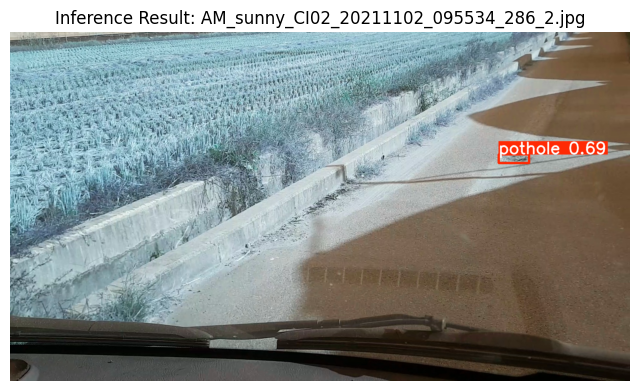

In [9]:
model = YOLO("/kaggle/working/pothole_yolov8_train/weights/best.pt")

TEST_IMAGE_DIR = "/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images"
test_image_paths = sorted(glob(os.path.join(TEST_IMAGE_DIR, "*.jpg")))
test_img_path = random.choice(test_image_paths)

results = model.predict(source=test_img_path, conf=0.25, imgsz=640, save=False)

result_img = results[0].plot()

plt.figure(figsize=(8, 6))
plt.imshow(result_img)
plt.axis("off")
plt.title(f"Inference Result: {os.path.basename(test_img_path)}")
plt.show()

## 10. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± (submission.csv)
ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ ÌïôÏäµÎêú YOLO Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ùÏ≤¥ ÌÉêÏßÄÎ•º ÏàòÌñâÌïòÍ≥†,  
ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†úÏ∂ú ÌòïÏãùÏóê ÎßûÏ∂∞ `submission.csv` ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.

- Ìïú Ïù¥ÎØ∏ÏßÄÎãπ Î∞ïÏä§ ÌïòÎÇòÎßå Ï†úÏ∂úÌïòÎ©∞, confidenceÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Î∞ïÏä§Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- Í∞ùÏ≤¥Î•º Í∞êÏßÄÌïòÏßÄ Î™ªÌïú Í≤ΩÏö∞, `ClassId`ÏôÄ Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëúÎäî Î™®Îëê 0ÏúºÎ°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§.
- Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏÜêÏÉÅÎêòÏóàÍ±∞ÎÇò Ïó¥Î¶¨ÏßÄ ÏïäÎäî Í≤ΩÏö∞ÏóêÎèÑ ÏóêÎü¨ ÏóÜÏù¥ ÎÑòÏñ¥Í∞ÄÎèÑÎ°ù ÏòàÏô∏ Ï≤òÎ¶¨Î•º Ìè¨Ìï®Ìï©ÎãàÎã§.
- Output Í≤ΩÎ°úÏù∏ /kagggle/working/Ïóê Ï†ÄÏû•Îê©ÎãàÎã§.

In [10]:
import pandas as pd

model = YOLO("/kaggle/working/pothole_yolov8_train/weights/best.pt")

TEST_IMG_DIR = "/kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images"
test_image_paths = sorted(glob(os.path.join(TEST_IMG_DIR, "*.jpg")))

submission_rows = []

for img_path in test_image_paths:
    image_id = os.path.basename(img_path)

    if cv2.imread(img_path) is None:
        print(f"Ïù¥ÎØ∏ÏßÄ Î°úÎìú Ïã§Ìå®: {image_id}")
        submission_rows.append({
            "ImageId": image_id,
            "ClassId": 0,
            "X": 0,
            "Y": 0,
            "Width": 0,
            "Height": 0,
        })
        continue

    results = model.predict(source=img_path, conf=0.25, imgsz=640, save=False)
    result = results[0]

    if len(result.boxes) > 0:
        boxes = result.boxes
        best_idx = boxes.conf.argmax().item()
        cls_id = int(boxes.cls[best_idx].item())
        cx, cy, w, h = boxes.xywhn[best_idx].tolist()

        submission_rows.append({
            "ImageId": image_id,
            "ClassId": cls_id,
            "X": round(cx, 6),
            "Y": round(cy, 6),
            "Width": round(w, 6),
            "Height": round(h, 6),
        })
    else:
        submission_rows.append({
            "ImageId": image_id,
            "ClassId": 0,
            "X": 0,
            "Y": 0,
            "Width": 0,
            "Height": 0,
        })

submission_df = pd.DataFrame(submission_rows, columns=["ImageId", "ClassId", "X", "Y", "Width", "Height"])
submission_path = "/kaggle/working/submission.csv"
submission_df.to_csv(submission_path, index=False)
print(f"Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å: {submission_path}")


image 1/1 /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images/AM_sunny_CI01_20210916_105931_11_117_2.jpg: 384x640 (no detections), 25.8ms
Speed: 2.0ms preprocess, 25.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images/AM_sunny_CI01_20210916_105931_11_118_2.jpg: 384x640 (no detections), 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images/AM_sunny_CI01_20210916_105931_11_134_1.jpg: 384x640 3 potholes, 25.1ms
Speed: 1.9ms preprocess, 25.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/pothole-detection-challenge/SSAFY_AI_CHALLENGE/test/images/AM_sunny_CI01_20210916_105931_11_137_2.jpg: 384x640 (no detections), 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 0.7ms postprocess per image at 